In [73]:
#Import the graphlab library
import graphlab

In [74]:
#Load the data of houses data in SFrame sale
sale = graphlab.SFrame('kc_house_data.gl/')

In [76]:
#Have a overlook of data and it's important features
sale

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560,2,0


In [77]:
# Setting the target to iPython Notebook
graphlab.canvas.set_target('ipynb') 

In [78]:
# View scatterplot to see raltion between sqft vs price of the house
sale.show(view="Scatter Plot", x="sqft_living", y="price")

In [79]:
# Splitting the Data set into train and test datasets4
# Taking 80% of the data as training set and 20% as test set
TrainData,TestData = sale.random_split(.8,seed=0)

In [80]:
# Let's compute the Summary statistics
# Computing mean of the House Prices using SArray by extarcting only 'price' column from 'sale' SFrame
# 'HousePrices' this is an SArray
HousePrices = sale['price'] 

In [81]:
#Verify that the 'price' data is now in form of an array by printing it
HousePrices

dtype: float
Rows: 21613
[221900.0, 538000.0, 180000.0, 604000.0, 510000.0, 1225000.0, 257500.0, 291850.0, 229500.0, 323000.0, 662500.0, 468000.0, 310000.0, 400000.0, 530000.0, 650000.0, 395000.0, 485000.0, 189000.0, 230000.0, 385000.0, 2000000.0, 285000.0, 252700.0, 329000.0, 233000.0, 937000.0, 667000.0, 438000.0, 719000.0, 580500.0, 280000.0, 687500.0, 535000.0, 322500.0, 696000.0, 550000.0, 640000.0, 240000.0, 605000.0, 625000.0, 775000.0, 861990.0, 685000.0, 309000.0, 488000.0, 210490.0, 785000.0, 450000.0, 1350000.0, 228000.0, 345000.0, 600000.0, 585000.0, 920000.0, 885000.0, 292500.0, 301000.0, 951000.0, 430000.0, 650000.0, 289000.0, 505000.0, 549000.0, 425000.0, 317625.0, 975000.0, 287000.0, 204000.0, 1325000.0, 1040000.0, 325000.0, 571000.0, 360000.0, 349000.0, 832500.0, 380000.0, 480000.0, 410000.0, 720000.0, 390000.0, 360000.0, 355000.0, 356000.0, 315000.0, 940000.0, 305000.0, 461000.0, 215000.0, 335000.0, 243500.0, 1099880.0, 153000.0, 430000.0, 700000.0, 905000.0, 247500.0

In [82]:
# Computing average value of house prices using .mean() function
Mean_HousePrice = HousePrices.mean() 
print "average House Price: " + str(Mean_HousePrice)

average House Price: 540088.141905


In [83]:
#Building model using linear regression with sqft_living as the only feature
Linear_Sqft_Model = graphlab.linear_regression.create(TrainData, target='price', features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16521

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.006000     | 4333939.815046     | 1835006.211075       | 264547.719534 | 230183.258267   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [84]:
# We can verify the trained linear model to test on test data
print Linear_Sqft_Model.evaluate(TestData)

{'max_error': 4131246.9371021967, 'rmse': 255222.5051367366}


In [85]:
# Using plots to visualize the predictions on test data

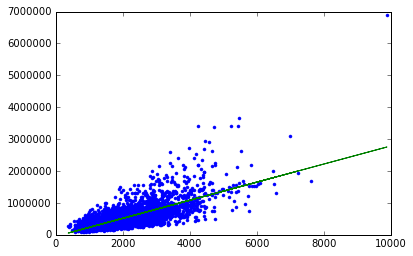

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(TestData['sqft_living'], TestData['price'],'.',
        TestData['sqft_living'], Linear_Sqft_Model.predict(TestData),'-')

#In the grpah Blue dots represent the original data, green line is represents the prediction from the simple regression

In [87]:
#Now I will create another model with more features to make better predictions
# Picking the few features like'bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode
Features = ['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [88]:
#Now Train the new linear regression model with specific features
Linear_Features_Model = graphlab.linear_regression.create(TrainData,target='price',features=Features,validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 79

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.027001     | 3984683.648662     | 188805.594852 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [89]:
#Checking the summary statistics of features with .show() function
sale[Features].show()

In [90]:
# Which area has the highest house sale prices?
#Using zipcode I can filter the data and put the 'BoxWhisker plot'

sale.show(view='BoxWhisker Plot', x='zipcode', y='price')

# To view more from this plot , move the mouse cursor on graph and also pull the bar at the botttom

In [91]:
# Now Comparison of  both the models
#SLR model with only one feature 'sqft_living' Vs SLR model with more features

print Linear_Sqft_Model.evaluate(TestData)
print Linear_Features_Model.evaluate(TestData)

{'max_error': 4131246.9371021967, 'rmse': 255222.5051367366}
{'max_error': 3152675.3151993384, 'rmse': 180325.5695098425}


In [92]:
 # we can observe from the output, the RMSE goes down from $255,192 to $180,325 with more features.

In [93]:
# Now I will build new and better model with still more added number of features using inear regression
# Also will compare all 3 models

# Features for advanced linear regression model
More_Features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode','condition', 'grade', 'waterfront', 'view', 'sqft_above', 
'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', ]

In [94]:
# Creating the advanced linear regression model
More_Features_LinearRegModel = graphlab.linear_regression.create(TrainData, target='price', features=More_Features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16491

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 91

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.029002     | 4237467.469272     | 1136144.799963       | 163211.905738 | 140220.616353   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [96]:
#With this 3rd model we will have lower RMSE and better predictions. 
#Evaluating using the test data set

print More_Features_LinearRegModel.evaluate(TestData)
#We can observe that RMSE goes down to 155191.

{'max_error': 3167906.987406278, 'rmse': 155191.62159303253}


In [97]:
# Now I will use trained models to predict the prie of a house

In [98]:
# Choose a house with 'id
house = sale[sale['id']=='1925069082']
# See its real price
print house['price']

[2200000.0, ... ]


In [99]:
#Using Square Feet Model
print Linear_Sqft_Model.predict(house)

# Model with a bit more features that the Square Feet Model
print Linear_Features_Model.predict(house)

[1265506.5856770184]
[1229686.6191782062]


In [100]:
#Using model with lots features
print More_Features_LinearRegModel.predict(house)

[1920024.0775825582]


In [101]:
#More_features model is doing better prediction in this case